<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Sentinel-5P-satellite" data-toc-modified-id="Sentinel-5P-satellite-1">Sentinel 5P satellite</a></span><ul class="toc-item"><li><span><a href="#Tropomi-sensor" data-toc-modified-id="Tropomi-sensor-1.1">Tropomi sensor</a></span></li></ul></li><li><span><a href="#Download-Sentinel-5P-data" data-toc-modified-id="Download-Sentinel-5P-data-2">Download Sentinel 5P data</a></span><ul class="toc-item"><li><span><a href="#Install-sentinelsat-and-geopandas-libraries" data-toc-modified-id="Install-sentinelsat-and-geopandas-libraries-2.1">Install <code>sentinelsat</code> and <code>geopandas</code> libraries</a></span></li><li><span><a href="#Search-for-data-using-SentinelSat-API" data-toc-modified-id="Search-for-data-using-SentinelSat-API-2.2">Search for data using SentinelSat API</a></span><ul class="toc-item"><li><span><a href="#Query-for-April-2020-over-LA" data-toc-modified-id="Query-for-April-2020-over-LA-2.2.1">Query for April 2020 over LA</a></span></li></ul></li></ul></li><li><span><a href="#Visualize-orbits-on-a-globe" data-toc-modified-id="Visualize-orbits-on-a-globe-3">Visualize orbits on a globe</a></span><ul class="toc-item"><li><span><a href="#Export-orbit-information-to-GeoPandas-GeoDataFrame" data-toc-modified-id="Export-orbit-information-to-GeoPandas-GeoDataFrame-3.1">Export orbit information to GeoPandas GeoDataFrame</a></span></li><li><span><a href="#Import-GeoDataFrame-into-ArcGIS-Spatially-Enabled-DataFrames" data-toc-modified-id="Import-GeoDataFrame-into-ArcGIS-Spatially-Enabled-DataFrames-3.2">Import GeoDataFrame into ArcGIS Spatially Enabled DataFrames</a></span><ul class="toc-item"><li><span><a href="#Download-netCDF-files" data-toc-modified-id="Download-netCDF-files-3.2.1">Download netCDF files</a></span></li></ul></li></ul></li></ul></div>

# Downloading Sentinel 5P data


## Download Sentinel 5P data

In [1]:
from arcgis.gis import GIS
import pandas as pd
from arcgis.features import GeoAccessor
from datetime import datetime, timedelta
import os
gis = GIS()

In [2]:
# environment settings
data_path = r'E:\GIS_Data\Imagery\sentinel-5p\wuhan_2019_2020'
wuhan_geojson_path = os.path.join(data_path, 'wuhan_aoi.geojson')

### Search for data using SentinelSat API

In [3]:
from sentinelsat import SentinelAPI, read_geojson, geojson_to_wkt
from datetime import date

In [19]:
api = SentinelAPI('s5pguest', 's5pguest', 'https://s5phub.copernicus.eu/dhus')
api

In [8]:
footprint = geojson_to_wkt(read_geojson(wuhan_geojson_path))

api.count(footprint, date=('20190401', '20190420'), area_relation='Contains', 
          platformname='Sentinel-5',producttype='L2__NO2___')

15

#### Query for control data - 2019

In [9]:
products_2019 = api.query(area=footprint, area_relation='Contains',
                         date=('20190210', '20190225'),
                         platformname='Sentinel-5',
                         producttype='L2__NO2___',
                         order_by='cloudcoverpercentage'
                        )

In [10]:
products_2019_df = api.to_dataframe(products_2019)
products_2019_df.head()

,title,link,link_alternative,link_icon,summary,ingestiondate,beginposition,endposition,orbitnumber,filename,...,platformshortname,processinglevel,processingmode,processingmodeabbreviation,processorversion,producttype,producttypedescription,revisionnumber,size,uuid
64eaf1b1-e4c9-469a-b573-54f9cf9f0784,S5P_OFFL_L2__NO2____20190223T051037_20190223T0...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-02-23T05:32:10Z, Instrument: TROPOM...",2019-03-07 21:35:09.329,2019-02-23 05:32:10,2019-02-23 06:24:28,7063,S5P_OFFL_L2__NO2____20190223T051037_20190223T0...,...,S5P,L2,Offline,OFFL,010202,L2__NO2___,Nitrogen Dioxide,01,307.52 MB,64eaf1b1-e4c9-469a-b573-54f9cf9f0784
65784042-8162-4d87-a314-7b50d8c9dec5,S5P_OFFL_L2__NO2____20190218T050345_20190218T0...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-02-18T05:25:19Z, Instrument: TROPOM...",2019-03-02 19:35:35.272,2019-02-18 05:25:19,2019-02-18 06:23:42,6992,S5P_OFFL_L2__NO2____20190218T050345_20190218T0...,...,S5P,L2,Offline,OFFL,010202,L2__NO2___,Nitrogen Dioxide,01,319.42 MB,65784042-8162-4d87-a314-7b50d8c9dec5
c8d24914-9506-4f73-8b5b-41a99f187645,S5P_OFFL_L2__NO2____20190220T042553_20190220T0...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-02-20T04:47:28Z, Instrument: TROPOM...",2019-03-04 20:05:31.577,2019-02-20 04:47:28,2019-02-20 05:45:51,7020,S5P_OFFL_L2__NO2____20190220T042553_20190220T0...,...,S5P,L2,Offline,OFFL,010202,L2__NO2___,Nitrogen Dioxide,01,321.19 MB,c8d24914-9506-4f73-8b5b-41a99f187645
81f72f13-1eae-4d76-bb33-98ac047445aa,S5P_OFFL_L2__NO2____20190222T034802_20190222T0...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-02-22T04:09:36Z, Instrument: TROPOM...",2019-03-06 20:35:10.229,2019-02-22 04:09:36,2019-02-22 05:01:53,7048,S5P_OFFL_L2__NO2____20190222T034802_20190222T0...,...,S5P,L2,Offline,OFFL,010202,L2__NO2___,Nitrogen Dioxide,01,305.6 MB,81f72f13-1eae-4d76-bb33-98ac047445aa
a5750810-c733-41c7-9562-65b3851015f7,S5P_OFFL_L2__NO2____20190221T040657_20190221T0...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,https://s5phub.copernicus.eu/dhus/odata/v1/Pro...,"Date: 2019-02-21T04:28:32Z, Instrument: TROPOM...",2019-03-05 20:05:38.489,2019-02-21 04:28:32,2019-02-21 05:26:55,7034,S5P_OFFL_L2__NO2____20190221T040657_20190221T0...,...,S5P,L2,Offline,OFFL,010202,L2__NO2___,Nitrogen Dioxide,01,322.43 MB,a5750810-c733-41c7-9562-65b3851015f7


In [11]:
products_2019_df.shape

(13, 29)

In [12]:
import warnings; warnings.simplefilter('ignore')
products_2019_gdf = api.to_geodataframe(products_2019)
products_2019_sdf = pd.DataFrame.spatial.from_geodataframe(products_2019_gdf)

MapView(layout=Layout(height='400px', width='100%'), mode='3D')


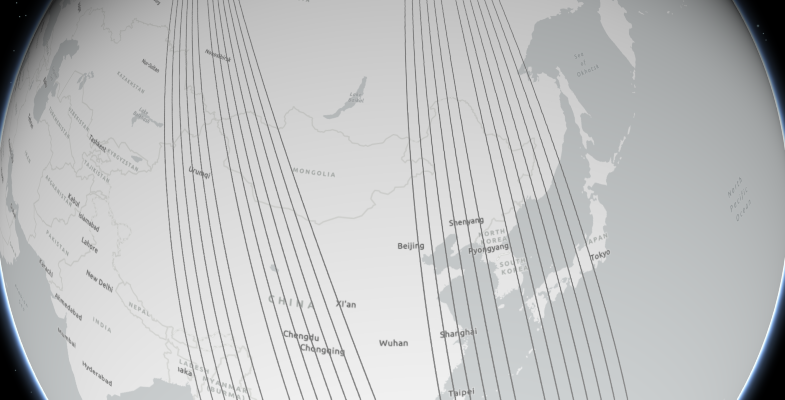

In [13]:
map1 = gis.map('Wuhan, China')
map1.mode='3D'
map1.basemap = 'gray-vector'
map1

In [14]:
products_2019_sdf.spatial.plot(map1, palette = 'PuBu', renderer_type='u',col='uuid', alpha=0.1)

True

#### Query for observation data - 2020

In [20]:
products_2020 = api.query(area=footprint, area_relation='Contains',
                         date=('20200210', '20200225'),
                         platformname='Sentinel-5',
                         producttype='L2__NO2___',
                         order_by='cloudcoverpercentage'
                        )

In [21]:
products_2020_df = api.to_dataframe(products_2020)
products_2020_df.shape

(13, 29)

### Download in parallel

#### Download control data - 2019

In [3]:
download_path_2019 = os.path.join(data_path, '02-2019')
if os.path.exists(download_path_2019):
    print(download_path_2019)
else:
    os.mkdir(download_path_2019)
    print('Created download path: ' + download_path_2019)

E:\GIS_Data\Imagery\sentinel-5p\wuhan_2019_2020\02-2019


In [ ]:
%%time
# download_all function downloads the requested concurrently
succeeded, scheduled, failed = api.download_all(products_2019,
                                                directory_path=download_path_2019, 
                                                n_concurrent_dl=4)

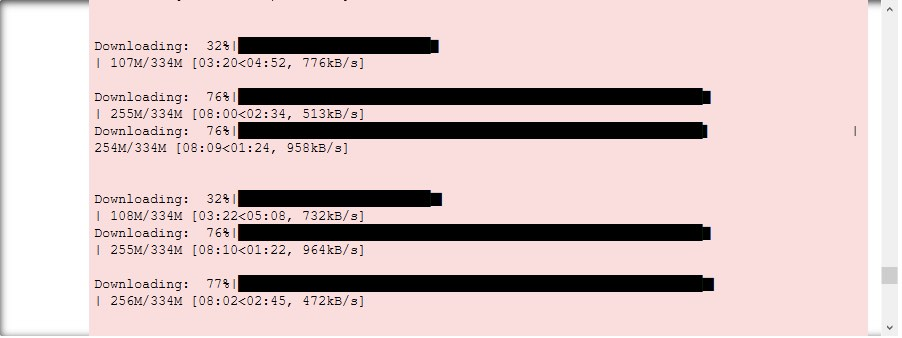

#### Download observation data - 2020

In [4]:
download_path_2020 = os.path.join(data_path, '02-2020')
if os.path.exists(download_path_2020):
    print(download_path_2020)
else:
    os.mkdir(download_path_2020)
    print('Created download path: ' + download_path_2020)

E:\GIS_Data\Imagery\sentinel-5p\wuhan_2019_2020\02-2020


In [ ]:
%%time
# download_all function downloads the requested concurrently
succeeded, scheduled, failed = api.download_all(products_2020,
                                                directory_path=download_path_2020, 
                                                n_concurrent_dl=4)

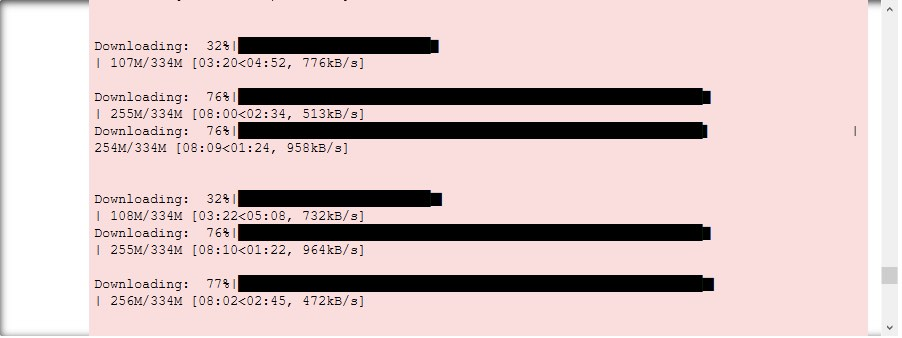

### Rename downloaded files

All files have been downloaded. At the time of writing this notebook, a [bug](https://github.com/sentinelsat/sentinelsat/issues/270) in the `sentinelsat` API causes it to download files as `.zip` while they are `.nc` files. Hence, in this section, we will rename the files in the cell below

In [30]:
def extract_files(download_path, wild_card_search = "/S5P_OFFL_*.zip"):
    from glob import glob
    from pathlib import Path
    file_list = glob(download_path + wild_card_search)
    file_list_extracted = []
    for file in file_list:
        p = Path(file)
        new_name = p.with_suffix('.nc')
        # change extension
        p_new = p.rename(new_name)

        file_list_extracted.append(new_name.name)
        print(new_name.name)
    return file_list_extracted

In [31]:
# rename 2019 files
file_list_2019 = extract_files(download_path_2019)

S5P_OFFL_L2__NO2____20190210T041212_20190210T055343_06878_01_010202_20190216T060954.nc
S5P_OFFL_L2__NO2____20190211T035316_20190211T053446_06892_01_010202_20190217T055157.nc
S5P_OFFL_L2__NO2____20190213T045654_20190213T063824_06921_01_010202_20190219T070301.nc
S5P_OFFL_L2__NO2____20190214T043758_20190214T061928_06935_01_010202_20190220T063435.nc
S5P_OFFL_L2__NO2____20190215T041902_20190215T060032_06949_01_010202_20190221T062644.nc
S5P_OFFL_L2__NO2____20190216T040006_20190216T054136_06963_01_010202_20190222T055319.nc
S5P_OFFL_L2__NO2____20190218T050345_20190218T064515_06992_01_010202_20190224T071227.nc
S5P_OFFL_L2__NO2____20190219T044449_20190219T062619_07006_01_010202_20190225T065043.nc
S5P_OFFL_L2__NO2____20190220T042553_20190220T060723_07020_01_010202_20190226T125225.nc
S5P_OFFL_L2__NO2____20190221T040657_20190221T054828_07034_01_010202_20190227T060438.nc
S5P_OFFL_L2__NO2____20190222T034802_20190222T052932_07048_01_010202_20190228T054110.nc
S5P_OFFL_L2__NO2____20190223T051037_2019022

In [32]:
# rename 2020 files
file_list_2020 = extract_files(download_path_2020)

S5P_OFFL_L2__NO2____20200210T050907_20200210T065037_12057_01_010302_20200213T100010.nc
S5P_OFFL_L2__NO2____20200211T045011_20200211T063141_12071_01_010302_20200214T095211.nc
S5P_OFFL_L2__NO2____20200212T043115_20200212T061245_12085_01_010302_20200215T094004.nc
S5P_OFFL_L2__NO2____20200213T041219_20200213T055349_12099_01_010302_20200216T091909.nc
S5P_OFFL_L2__NO2____20200214T035323_20200214T053454_12113_01_010302_20200217T083559.nc
S5P_OFFL_L2__NO2____20200216T045702_20200216T063832_12142_01_010302_20200219T100810.nc
S5P_OFFL_L2__NO2____20200218T041911_20200218T060041_12170_01_010302_20200221T092253.nc
S5P_OFFL_L2__NO2____20200221T050354_20200221T064525_12213_01_010302_20200224T094812.nc
S5P_OFFL_L2__NO2____20200222T044459_20200222T062629_12227_01_010302_20200225T095131.nc
S5P_OFFL_L2__NO2____20200223T042604_20200223T060734_12241_01_010302_20200226T091444.nc
S5P_OFFL_L2__NO2____20200224T040708_20200224T054839_12255_01_010302_20200227T090230.nc


## Create Multidimensional Raster

#### Create file geodatabase

In [5]:
import arcpy

In [6]:
result = arcpy.management.CreateFileGDB(out_folder_path=data_path, out_name='wuhan_data')
result

<Result 'E:\\GIS_Data\\Imagery\\sentinel-5p\\wuhan_2019_2020\\wuhan_data.gdb'>

In [8]:
fgdb_path = os.path.join(data_path, 'wuhan_data.gdb')

#### Create Mosaic DataSet

In [9]:
%%time
coordinate_system="PROJCS['WGS_1984_Web_Mercator_Auxiliary_Sphere',GEOGCS['GCS_WGS_1984',DATUM['D_WGS_1984',SPHEROID['WGS_1984',6378137.0,298.257223563]],PRIMEM['Greenwich',0.0],UNIT['Degree',0.0174532925199433]],PROJECTION['Mercator_Auxiliary_Sphere'],PARAMETER['False_Easting',0.0],PARAMETER['False_Northing',0.0],PARAMETER['Central_Meridian',0.0],PARAMETER['Standard_Parallel_1',0.0],PARAMETER['Auxiliary_Sphere_Type',0.0],UNIT['Meter',1.0]]"

arcpy.management.CreateMosaicDataset(in_workspace=fgdb_path, 
                                     in_mosaicdataset_name="wuhan_2019_2020",
                                     coordinate_system=coordinate_system)

Wall time: 7.85 s


In [10]:
md_path = os.path.join(fgdb_path, 'wuhan_2019_2020')
md_path

'E:\\GIS_Data\\Imagery\\sentinel-5p\\wuhan_2019_2020\\wuhan_data.gdb\\wuhan_2019_2020'

#### Add netCDF files to Mosaic Dataset

In [11]:
download_path_2019, download_path_2020

('E:\\GIS_Data\\Imagery\\sentinel-5p\\wuhan_2019_2020\\02-2019',
 'E:\\GIS_Data\\Imagery\\sentinel-5p\\wuhan_2019_2020\\02-2020')

In [12]:
%%time
input_path = f'{download_path_2019};{download_path_2020}'
var_names = "Variables /PRODUCT/nitrogendioxide_tropospheric_column,/PRODUCT/qa_value"

arcpy.management.AddRastersToMosaicDataset(in_mosaic_dataset=md_path,
                                           raster_type="NetCDF", 
                                           input_path = input_path, 
                                           update_cellsize_ranges="UPDATE_CELL_SIZES", 
                                           update_boundary="UPDATE_BOUNDARY", 
                                           update_overviews="UPDATE_OVERVIEWS", 
                                           maximum_pyramid_levels=None, 
                                           maximum_cell_size=0, 
                                           minimum_dimension=1500, 
                                           spatial_reference=None, 
                                           filter="*.nc;*.nc4", 
                                           sub_folder="NO_SUBFOLDERS", 
                                           duplicate_items_action="ALLOW_DUPLICATES", 
                                           build_pyramids="NO_PYRAMIDS", 
                                           calculate_statistics="NO_STATISTICS", 
                                           build_thumbnails="NO_THUMBNAILS", 
                                           operation_description="add vars 2019 2020", 
                                           force_spatial_reference="NO_FORCE_SPATIAL_REFERENCE", 
                                           estimate_statistics="NO_STATISTICS", 
                                           aux_inputs=var_names,
                                           enable_pixel_cache="NO_PIXEL_CACHE"
                                           )

Wall time: 4h 57min 8s


Building stats

In [13]:
%%time

arcpy.management.BuildPyramidsandStatistics(in_workspace=md_path,
                                            include_subdirectories=None,
                                            build_pyramids="BUILD_PYRAMIDS", 
                                            calculate_statistics="CALCULATE_STATISTICS", 
                                            BUILD_ON_SOURCE="NONE", 
                                            block_field='', 
                                            estimate_statistics="NONE", 
                                            x_skip_factor=1, 
                                            y_skip_factor=1, 
                                            ignore_values=[], 
                                            pyramid_level=-1, 
                                            SKIP_FIRST="NONE", 
                                            resample_technique="NEAREST", 
                                            compression_type="DEFAULT", 
                                            compression_quality=75, 
                                            skip_existing="SKIP_EXISTING", 
                                            where_clause='', 
                                            sips_mode="NONE")

ExecuteError: ERROR 999999: Something unexpected caused the tool to fail. Contact Esri Technical Support (http://esriurl.com/support) to Report a Bug, and refer to the error help for potential solutions or workarounds.
Failed to execute (BuildPyramidsandStatistics).


Subset multidimensional raster to CRF, applies NY AOI as processing extent

In [15]:
%%time
crf_path = os.path.join(data_path, 'wuhan_19_20.crf')
arcpy.md.SubsetMultidimensionalRaster(in_multidimensional_raster=md_path, 
                                      out_multidimensional_raster= crf_path, 
                                      variables="/product/nitrogendioxide_tropospheric_column;/product/qa_value", 
                                      dimension_def="ALL", 
                                      dimension_ranges=None, 
                                      dimension_values=None, 
                                      dimension='', 
                                      start_of_first_iteration='', 
                                      end_of_first_iteration='', 
                                      iteration_step=None, 
                                      iteration_unit='')

Wall time: 28min 5s


#### Copy AOI GeoJSON into FeatureClass for zonal stats

In [17]:
print(wuhan_geojson_path)
aoi_fc_path = os.path.join(fgdb_path, 'wuhan_aoi2')
print(aoi_fc_path)

E:\GIS_Data\Imagery\sentinel-5p\wuhan_2019_2020\wuhan_aoi.geojson
E:\GIS_Data\Imagery\sentinel-5p\wuhan_2019_2020\wuhan_data.gdb\wuhan_aoi2


In [ ]:

arcpy.conversion.JSONToFeatures(in_json_file=wuhan_geojson_path, 
                                out_features=aoi_fc_path, 
                                geometry_type="POLYGON")

In [ ]:
arcpy.md.SubsetMultidimensionalRaster("wuhan_2019_2020", 
                                      r"E:\GIS_Data\Imagery\sentinel-5p\wuhan_2019_2020\wuhan_19_20_c.crf", 
                                      "/product/nitrogendioxide_tropospheric_column;/product/qa_value", 
                                      "ALL", None, None, '', '', '', None, '')

In [18]:
arcpy.env.extent